


Epoch 1/20


469/469 [==============================] - 9s 14ms/step - loss: 0.2464 - accuracy: 0.9263 - val_loss: 0.1010 - val_accuracy: 0.9677
Epoch 2/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1014 - accuracy: 0.9684 - val_loss: 0.0838 - val_accuracy: 0.9731
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0718 - accuracy: 0.9772 - val_loss: 0.0713 - val_accuracy: 0.9776
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0569 - accuracy: 0.9816 - val_loss: 0.0666 - val_accuracy: 0.9793
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0715 - val_accuracy: 0.9787
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0634 - val_accuracy: 0.9795
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0637 - val_accuracy: 0

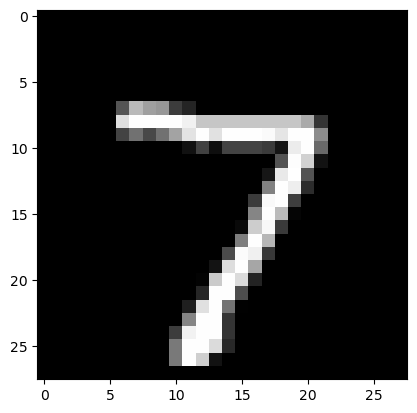

1/1 [==============================] - 0s 180ms/step
Model prediction: 7


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
          epochs=20, batch_size=128)

# plot one of the images in the test data
plt.imshow(x_test[0], cmap='gray')
plt.show()

# make a prediction on the image using the trained model
prediction = model.predict(x_test[0].reshape(1, -1))
print('Model prediction:', np.argmax(prediction))

In [2]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
#from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

# Fix random seed for reproducibility
numpy.random.seed(7)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)
num_classes = 10

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

Epoch 1/100
11/11 [==============================] - 8s 14ms/step - loss: 0.1391
Epoch 2/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0526
Epoch 3/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0424
Epoch 4/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0356
Epoch 5/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0319
Epoch 6/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0291
Epoch 7/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0264
Epoch 8/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0231
Epoch 9/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0188
Epoch 10/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0133
Epoch 11/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0060
Epoch 12/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0018
Epoch 13/100
11/11 [=====

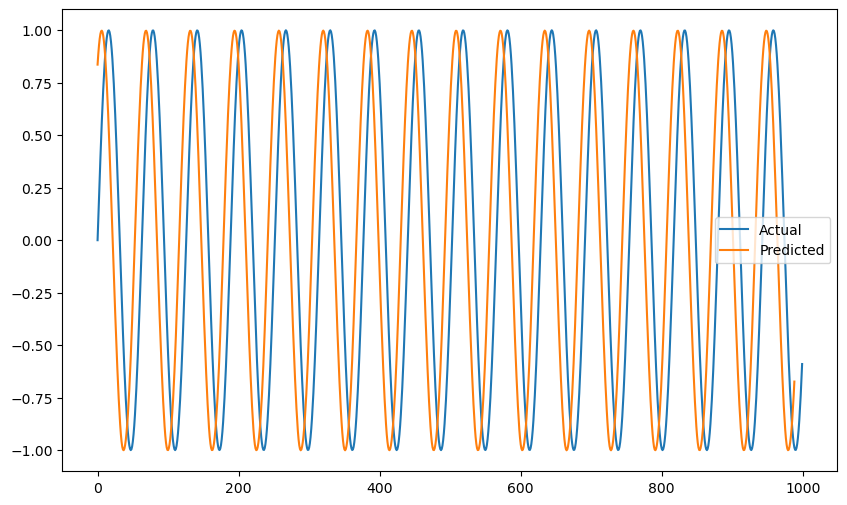

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your time series dataset
# For this example, let's use a simple sine wave
data = np.sin(np.arange(0, 100, 0.1))

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Prepare the data for LSTM model
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Reshape input data to be 3D [samples, time steps, features] as required by LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data, label='Actual')
plt.plot(np.concatenate([train_predict, test_predict]), label='Predicted')
plt.legend()
plt.show()